In [1]:
#Predict the insurance cost using the Multilinear Regression model
#Data - https://www.kaggle.com/ruslankl/health-care-cost-prediction-w-linear-regression/data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing #Helps in scaling - standardization or normalization
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/megha/OneDrive/Desktop/Python/ibm/insurance.csv')

### Step 1: Descriptive Statistics 

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Step 2: Dealing with Null Values 

In [8]:
#There are no Null Values 

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Step 3: Data Cleaning

In [9]:
#Data is cleaned

### Step 4: Exploratory Data Analysis 

In [10]:
#Here the target variable (Charges) is continuous 

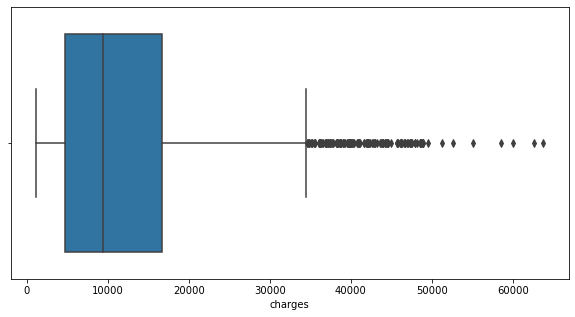

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['charges'])
plt.show()

<AxesSubplot:xlabel='charges', ylabel='Density'>

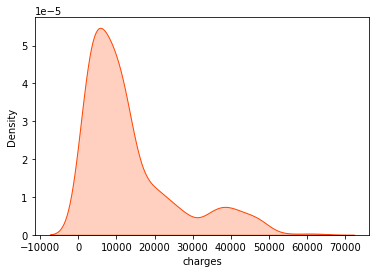

In [12]:
sns.kdeplot(df['charges'], shade=True, color='orangered')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

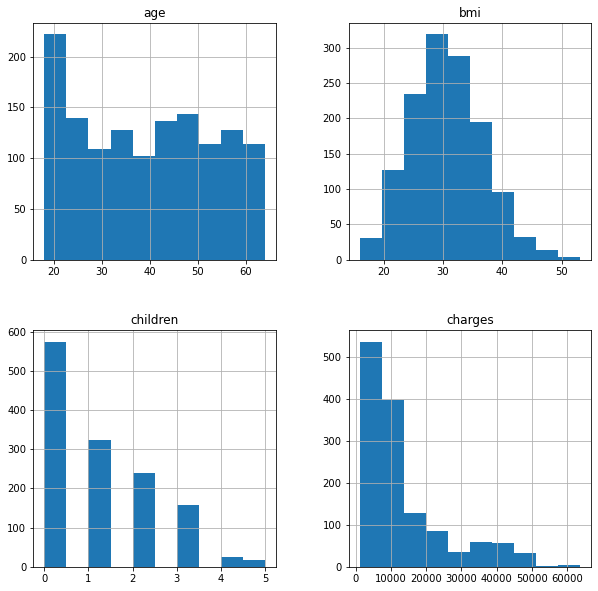

In [13]:
df.hist(figsize=(10,10))

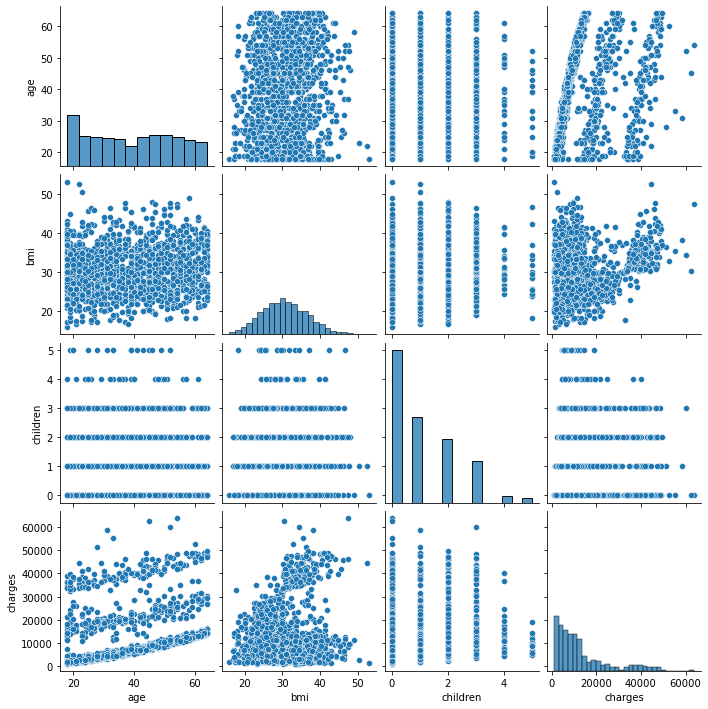

In [14]:
sns.pairplot(data=df)

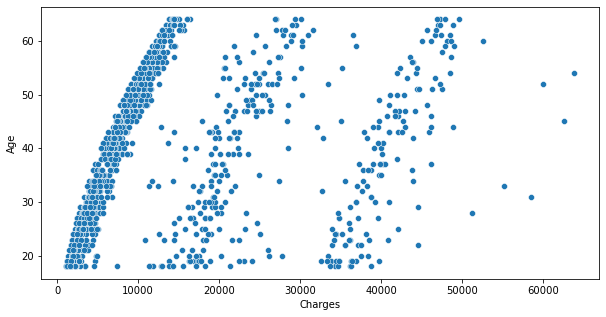

In [15]:
#Effect of age on charges 

#ScatterPlot - we use it when we have continuous data - here age and charges both are continuous  

#Scatter Plot using Matplotlib
plt.figure(figsize=(10,5))
plt.xlabel('Charges')
plt.ylabel('Age')
sns.scatterplot(df['charges'],df['age'])
plt.show()


<AxesSubplot:xlabel='charges', ylabel='age'>

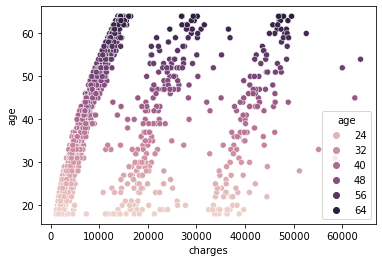

In [16]:
#Scatterplot using Seaborn

sns.scatterplot(x='charges', y='age', data=df, hue='age')

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

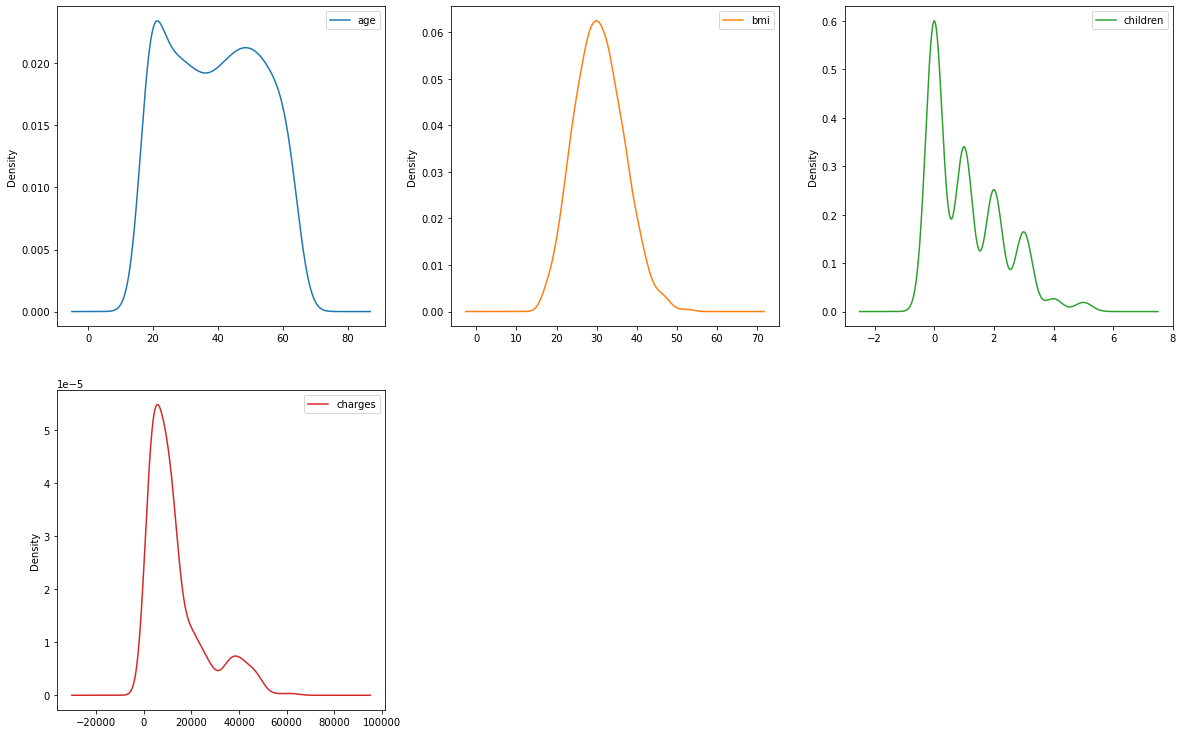

In [17]:
#Density Plot - Density Plots helps in analysing the skewness of variables 

df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(20, 20))

### Step 5: Converting Categorical Variable into Numeric 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
#Frequency Encoding for categorical variables 

df1 = df

sex = df['sex'].value_counts().to_dict()
smoker = df['smoker'].value_counts().to_dict()
region = df['region'].value_counts().to_dict()

df1['sex'] = df1['sex'].map(sex)
df1['smoker'] = df1['smoker'].map(smoker)
df1['region'] = df1['region'].map(region)

In [21]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,662,27.900,0,274,325,16884.92400
1,18,676,33.770,1,1064,364,1725.55230
2,28,676,33.000,3,1064,364,4449.46200
3,33,676,22.705,0,1064,325,21984.47061
4,32,676,28.880,0,1064,325,3866.85520


In [22]:
#Converting all the columns into float

for i in df1:
    df1[i]=df1[i].astype(float)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(7)
memory usage: 73.3 KB


### Step 6: Feature Selection

In [24]:
df1.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,0.025019,-0.011601,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,-0.076185,0.017027,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,-0.003750,0.271051,0.198341
children,0.042469,0.017163,0.012759,1.000000,-0.007673,-0.022307,0.067998
smoker,0.025019,-0.076185,-0.003750,-0.007673,1.000000,-0.067832,-0.787251
region,-0.011601,0.017027,0.271051,-0.022307,-0.067832,1.000000,0.073181
charges,0.299008,0.057292,0.198341,0.067998,-0.787251,0.073181,1.000000


<AxesSubplot:>

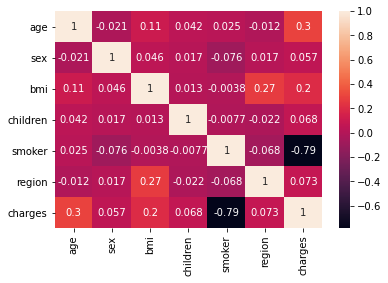

In [25]:
sns.heatmap(df1.corr(), annot=True)

In [26]:
#Keeping the threshold as 0.1
#We Select all the featues except for ['sex', 'children', 'region']

x = df.drop(['sex', 'children', 'region','charges'], axis= 1)
y = df['charges']

### Step 7: Splitting the data into Train and Test set 

In [27]:
from sklearn.model_selection import train_test_split 

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

### Step 8: Standardizing the data 

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler().fit(x)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Step 9: Multilinear Regression Model Implementation

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
# Creating object of LinearRegression Model
lr = LinearRegression()

# fitting the training data
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(x_test)

### Model Evaluation

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


In [35]:
print("R2 score is ", r2_score)
print("Mean Squared Error is", mse)


R2 score is  0.7776932310583374
Mean Squared Error is 34512843.8802279


In [36]:
#With a very high negative value of R2 it is evident that the model is leading the worse fit.
#Reason of negative value can also be that the constraint is not added to the model.

#References on negative R2 value 
#https://medium.com/analytics-vidhya/is-it-possible-to-have-a-negative-r-square-847a6a4a2fbe
#https://www.researchgate.net/post/Can_we_have_a_negative_R_squared_in_fitting_a_simple_linear_regression_for_exemple_and_how_we_can_explain_this_negative_value
#https://web.maths.unsw.edu.au/~adelle/Garvan/Assays/GoodnessOfFit.html